1. Package import

In [182]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. make array and initilize value

In [183]:
datanum= 300

epoch = 10000

# array for graph
train_loss_Array=np.zeros((epoch,1))
test_loss_Array=np.zeros((epoch,1))
W_Array=np.zeros((epoch,4))

x_epoch=np.arange(epoch)

# dot for gradient decent
train_X =np.zeros((datanum,4))
train_Y =np.zeros((datanum,1))

test_X =np.zeros((datanum,4))
test_Y =np.zeros((datanum,1))




3. read train and test data

In [184]:
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        train_X[ct][0]= 1
        train_X[ct][1]=i[0]
        train_X[ct][2]=i[1]
        train_X[ct][3]=i[2]
        train_Y[ct][0]=i[3]
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_X[ct][0]=1
        test_X[ct][1]=i[0]
        test_X[ct][2]=i[1]
        test_X[ct][3]=i[2]
        test_Y[ct][0]=i[3]
        ct += 1

        

[ 0 ] x = 0.27354771453665605 , y =  -8.932101598046074 , z =  18.70868394492699 , h =  73.57882491359598
[ 1 ] x = 5.403327323126673 , y =  4.782976500936417 , z =  -18.76220985503919 , h =  -56.41043333872962
[ 2 ] x = 0.029941312523676267 , y =  -3.2459156984821025 , z =  6.9324982114247895 , h =  52.39076824816363
[ 3 ] x = 3.047974457680872 , y =  0.7152107112924928 , z =  -1.9654187170206976 , h =  -6.936295282007531
[ 4 ] x = 1.3020743188547064 , y =  -5.871807382211632 , z =  -15.702181352019878 , h =  -34.99701707942456
[ 5 ] x = 0.48067768765626884 , y =  -2.9117619875044713 , z =  -2.3631235358529112 , h =  -19.85473503546304
[ 6 ] x = 1.6315020736136816 , y =  9.399052248888598 , z =  2.47547991106324 , h =  4.6693089029172725
[ 7 ] x = 6.373997103111523 , y =  16.58421457152967 , z =  17.896253239300936 , h =  20.327296910572635
[ 8 ] x = 7.003140610383589 , y =  17.425389177900183 , z =  -11.921952696244727 , h =  -96.11724036189486
[ 9 ] x = 11.816393974825985 , y =  10.

[ 167 ] x = 162.52947372605468 , y =  175.7055292430184 , z =  157.56689552163772 , h =  461.099590653304
[ 168 ] x = 169.2534516080089 , y =  166.68944979108716 , z =  156.35816485228443 , h =  444.74041185555274
[ 169 ] x = 171.81604883725834 , y =  168.62601506567017 , z =  182.0424878286843 , h =  559.2941672897992
[ 170 ] x = 166.6536883486985 , y =  179.74102737530825 , z =  179.00176836276478 , h =  520.7242845830516
[ 171 ] x = 167.42975215673894 , y =  177.25996334368492 , z =  177.7656838697003 , h =  543.9072836497579
[ 172 ] x = 175.39172494850197 , y =  175.2450539566554 , z =  178.8228773362372 , h =  553.6994922055749
[ 173 ] x = 176.7263085622774 , y =  164.052969131112 , z =  175.16139026629168 , h =  551.8333172517046
[ 174 ] x = 172.90492393841598 , y =  164.61632874003925 , z =  155.8462474285136 , h =  461.8460956347972
[ 175 ] x = 179.61911009260731 , y =  180.6874419386157 , z =  175.80260632223604 , h =  544.3939896347154
[ 176 ] x = 177.9060114415342 , y =  169

[ 3 ] x = 4.279318140013612 , y =  2.7478782319669532 , z =  -5.857124688099528 , h =  -24.644937076318406
[ 4 ] x = 0.12597468175861692 , y =  -4.349421364234274 , z =  5.777459804168258 , h =  31.934656626900196
[ 5 ] x = 3.6725284790568056 , y =  4.806945427680269 , z =  16.194355542775977 , h =  58.83605979480018
[ 6 ] x = 8.593131319642193 , y =  0.1692560830716623 , z =  -7.2674044809937985 , h =  -20.814998770476326
[ 7 ] x = 6.932055358608461 , y =  3.9942471291839015 , z =  -7.353509319767639 , h =  -30.470476178829898
[ 8 ] x = 5.7725624399182 , y =  6.180844941592826 , z =  14.614563941324331 , h =  51.86912832202987
[ 9 ] x = 5.249971848029935 , y =  -0.8894670682688375 , z =  13.703257691082339 , h =  61.84193674889696
[ 10 ] x = 5.494284358098707 , y =  19.502250622559423 , z =  7.841430096926274 , h =  -2.1444964993150393
[ 11 ] x = 8.419997874673692 , y =  6.755504840121768 , z =  -5.554247861668621 , h =  -27.308003252244326
[ 12 ] x = 11.793895799920392 , y =  11.1856

[ 140 ] x = 142.5913386281891 , y =  148.2236072624575 , z =  125.32456867276116 , h =  347.4423987943187
[ 141 ] x = 140.47684294146856 , y =  149.56571645838108 , z =  133.80188654508459 , h =  376.5529562050448
[ 142 ] x = 137.9817222375712 , y =  134.38599421565408 , z =  145.60493169629098 , h =  451.62946059142695
[ 143 ] x = 143.4117920156549 , y =  142.90358374747476 , z =  152.94508577678988 , h =  469.3849676278649
[ 144 ] x = 139.54476063242743 , y =  145.53589476065818 , z =  135.89601825143473 , h =  392.05704411684997
[ 145 ] x = 146.82890003618306 , y =  150.2596488593019 , z =  138.19334366068279 , h =  399.08297696031036
[ 146 ] x = 147.61543410163935 , y =  146.6940565644716 , z =  158.9410851051234 , h =  489.9916613931897
[ 147 ] x = 150.38734323230693 , y =  138.11208283337638 , z =  135.84027690602582 , h =  417.52428518965746
[ 148 ] x = 144.36393067737205 , y =  154.2778955178576 , z =  150.61917681733615 , h =  438.2848469110015
[ 149 ] x = 148.75480889793417 ,

[ 280 ] x = 281.7369600076893 , y =  283.89708012482976 , z =  261.0167649485898 , h =  758.009859552389
[ 281 ] x = 276.1218908039077 , y =  284.56749802335906 , z =  287.47186291236085 , h =  856.874346406633
[ 282 ] x = 284.93041472666573 , y =  282.96883730343274 , z =  295.17277499301497 , h =  899.6838400918601
[ 283 ] x = 283.71649588032443 , y =  286.48143070834436 , z =  295.7176323596946 , h =  893.6241639024142
[ 284 ] x = 285.54901673772764 , y =  291.67034686134076 , z =  287.9079675438568 , h =  853.8401931904732
[ 285 ] x = 286.2815433344984 , y =  275.63024896576206 , z =  284.75488529884586 , h =  874.0405865983578
[ 286 ] x = 288.56033806931345 , y =  293.263400336158 , z =  290.1154737599946 , h =  862.4954324369758
[ 287 ] x = 286.95280097106496 , y =  296.26599034613866 , z =  288.7901535547059 , h =  849.5814344976113
[ 288 ] x = 285.4748489027017 , y =  293.5495180163035 , z =  280.5570396878752 , h =  820.6039716215955
[ 289 ] x = 290.30248739006845 , y =  281.3

4. Processing Gradient decent(training)

In [185]:
lr=0.00000001 #learning Rate

W=np.random.randn(4)*0.1
W=W.reshape(4,1)

W_=np.zeros((4,1))

train_X=train_X.T
train_Y=train_Y.T

test_X=test_X.T
test_Y=test_Y.T

for iter in range(epoch):
    
    #calculate the train loss
    loss=(W*train_X-train_Y)*(W*train_X-train_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    train_loss_Array[iter]=loss
    
#     print("train")
#     print(loss)
    
    #calculate the train loss
    loss=(W*test_X-test_Y)*(W*test_X-test_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    test_loss_Array[iter]=loss
    
#     print("test")
#     print(loss)
        
    W_[0] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[0])
    W_[1] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[1])
    W_[2] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[2])
    W_[3] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[3])

#     print(W_)
#     print(W)
    # update the parameters
    W = W - W_ * lr 
    W_Array[iter] = W.reshape(4)
 

train
563380.7132973593
test
561370.3100199128
train
562370.9205118406
test
560362.0952890172
train
561363.2336489994
test
559355.9864518228
train
560357.6486688274
test
558351.9794658542
train
559354.161538795
test
557350.070296122
train
558352.7682338386
test
556350.2549151094
train
557353.4647363464
test
555352.5293027573
train
556356.2470361446
test
554356.8894464526
train
555361.1111304847
test
553363.3313410132
train
554368.0530240297
test
552371.8509886746
train
553377.0687288396
test
551382.4443990773
train
552388.1542643594
test
550395.1075892529
train
551401.3056574049
test
549409.8365836092
train
550416.5189421492
test
548426.6274139197
train
549433.7901601096
test
547445.4761193073
train
548453.1153601342
test
546466.3787462325
train
547474.490598388
test
545489.3313484801
train
546497.9119383408
test
544514.3299871446
train
545523.3754507522
test
543541.3707306186
train
544550.87721366
test
542570.4496545776
train
543580.4133123659
test
541601.5628419688
train
542611.97983

train
390648.81088581815
test
388968.94716280286
train
390005.7891204771
test
388327.4515412179
train
389364.1646237877
test
387687.3527659392
train
388723.93467187544
test
387048.6481117674
train
388085.09654594486
test
386411.3348585863
train
387447.64753227035
test
385775.41029135394
train
386811.5849221865
test
385140.8717000925
train
386176.9060120793
test
384507.71637988003
train
385543.60810337635
test
383875.94163084024
train
384911.68850253837
test
383245.5447581343
train
384281.1445210493
test
382616.5230719506
train
383651.97347540746
test
381988.87388749624
train
383024.17268711654
test
381362.59452498774
train
382397.73948267597
test
380737.68230964185
train
381772.6711935723
test
380114.13457166613
train
381148.96515627
test
379491.94864625036
train
380526.6187122018
test
378871.121873557
train
379905.62920776044
test
378251.65159871225
train
379285.99399428914
test
377633.5351717971
train
378667.71042807243
test
377016.7699478379
train
378050.7758703276
test
376401.35328

train
235560.72956413063
test
234376.79187831233
train
235268.5127196397
test
234085.9002196622
train
234976.99906500126
test
233795.71106925906
train
234686.18717894162
test
233506.22300552498
train
234396.07564287848
test
233217.4346095757
train
234106.66304091658
test
232929.34446521537
train
233817.94795984245
test
232641.9511589322
train
233529.9289891193
test
232355.25327989302
train
233242.60472088258
test
232069.24941993834
train
232955.9737499345
test
231783.938173578
train
232670.03467373957
test
231499.31813798542
train
232384.7860924195
test
231215.38791299344
train
232100.2266087482
test
230932.14610108893
train
231816.35482814716
test
230649.5913074081
train
231533.16935868046
test
230367.72213973166
train
231250.66881104984
test
230086.53720847995
train
230968.85179858978
test
229806.03512670787
train
230687.71693726303
test
229526.21451010025
train
230407.2628456553
test
229247.0739769671
train
230127.48814497076
test
228968.61214823823
train
229848.3914590269
test
2286

train
173500.9188029752
test
172686.50298737106
train
173367.56159508633
test
172554.2578865601
train
173234.58013448745
test
172422.38782840973
train
173101.97362509533
test
172290.89201693726
train
172969.7412723635
test
172159.7696576977
train
172837.8822832795
test
172029.01995778113
train
172706.39586636203
test
171898.64212580927
train
172575.28123165792
test
171768.63537193323
train
172444.53759073952
test
171638.9989078302
train
172314.16415670177
test
171509.73194670098
train
172184.16014415934
test
171380.83370326678
train
172054.52476924387
test
171252.30339376687
train
171925.2572496011
test
171124.14023595522
train
171796.3568043881
test
170996.34344909812
train
171667.82265427048
test
170868.91225397118
train
171539.6540214195
test
170741.84587285653
train
171411.8501295094
test
170615.14352954007
train
171284.41020371448
test
170488.80444930863
train
171157.3334707064
test
170362.82785894716
train
171030.61915865136
test
170237.21298673612
train
170904.26649720737
test
1

test
147405.32435258257
train
147875.97540047244
test
147353.32843503333
train
147823.26324415283
test
147301.53239276554
train
147770.7511576121
test
147249.9357718544
train
147718.43868756012
test
147198.53811927445
train
147666.32538160394
test
147147.3389828982
train
147614.41078824652
test
147096.33791149384
train
147562.69445688472
test
147045.53445472405
train
147511.17593780765
test
146994.92816314424
train
147459.85478219515
test
146944.51858820065
train
147408.73054211607
test
146894.30528222886
train
147357.80277052644
test
146844.28779845207
train
147307.07102126812
test
146794.46569097956
train
147256.53484906675
test
146744.83851480478
train
147206.19380953044
test
146695.40582580384
train
147156.04745914784
test
146646.16718073384
train
147106.09535528673
test
146597.1221372312
train
147056.33705619216
test
146548.2702538101
train
147006.77212098494
test
146499.61108986055
train
146957.40010965982
test
146451.1442056471
train
146908.2205830842
test
146402.8691623071
trai

test
139317.14895989985
train
139602.5002895734
test
139305.32520126578
train
139590.03046670335
test
139293.60628747247
train
139577.66579399467
test
139281.9919555727
train
139565.4060087234
test
139270.48194315747
train
139553.25084870317
test
139259.07598835556
train
139541.2000522841
test
139247.7738298323
train
139529.25335835174
test
139236.5752067884
train
139517.4105063259
test
139225.47985895904
train
139505.67123616
test
139214.48752661294
train
139494.0352883398
test
139203.5979505513
train
139482.5024038824
test
139192.81087210675
train
139471.0723243352
test
139182.12603314218
train
139459.74479177498
test
139171.54317605007
train
139448.519548807
test
139161.06204375124
train
139437.39633856367
test
139150.68237969393
train
139426.37490470379
test
139140.40392785266
train
139415.45499141153
test
139130.2264327275
train
139404.63634339534
test
139120.14963934282
train
139393.91870588707
test
139110.1732932464
train
139383.3018246408
test
139100.29714050834
train
139372.78

train
139081.58243391462
test
138947.80071356343
train
139087.79861916017
test
138954.64151382417
train
139094.0705415226
test
138961.53755848214
train
139100.3980411204
test
138968.48868797088
train
139106.78095841248
test
138975.49474306425
train
139113.21913419725
test
138982.5555648756
train
139119.71240961237
test
138989.67099485744
train
139126.2606261338
test
138996.84087480055
train
139132.86362557518
test
139004.06504683328
train
139139.52125008727
test
139011.34335342105
train
139146.23334215727
test
139018.67563736578
train
139152.9997446081
test
139026.06174180494
train
139159.8203005978
test
139033.501510211
train
139166.69485361894
test
139040.99478639115
train
139173.62324749786
test
139048.54141448595
train
139180.60532639406
test
139056.14123896934
train
139187.64093479962
test
139063.79410464774
train
139194.72991753844
test
139071.49985665924
train
139201.8721197658
test
139079.25834047317
train
139209.06738696736
test
139087.06940188952
train
139216.31556495902
test

train
144538.58006490103
test
144616.31367250517
train
144557.26836091687
test
144635.45562867043
train
144575.97008128327
test
144654.6106338804
train
144594.68515985567
test
144673.7786222647
train
144613.41353064583
test
144692.9595281092
train
144632.15512782143
test
144712.15328585566
train
144650.9098857059
test
144731.35983010134
train
144669.677738778
test
144750.57909559863
train
144688.45862167145
test
144769.8110172549
train
144707.2524691748
test
144789.05553013214
train
144726.0592162309
test
144808.3125694465
train
144744.87879793698
test
144827.58207056837
train
144763.71114954364
test
144846.8639690215
train
144782.55620645534
test
144866.1582004832
train
144801.4139042296
test
144885.46470078366
train
144820.2841785767
test
144904.78340590594
train
144839.16696535962
test
144924.11425198545
train
144858.06220059362
test
144943.45717530983
train
144876.96982044575
test
144962.8121123185
train
144895.88976123492
test
144982.17899960227
train
144914.82195943117
test
14500

train
149908.20907836876
test
150096.02352685647
train
149928.56561139354
test
150116.7415932961
train
149948.92245014856
test
150137.45965940322
train
149969.27956108566
test
150158.1776918658
train
149989.63691074637
test
150178.8956574615
train
150009.9944657618
test
150199.6135230573
train
150030.35219285236
test
150220.3312556095
train
150050.71005882762
test
150241.04882216334
train
150071.06803058632
test
150261.76618985293
train
150091.42607511568
test
150282.483325901
train
150111.78415949174
test
150303.20019761875
train
150132.14225087894
test
150323.91677240565
train
150152.50031652985
test
150344.63301774926
train
150172.8583237852
test
150365.34890122517
train
150193.21624007358
test
150386.06439049647
train
150213.5740329112
test
150406.779453314
train
150233.9316699018
test
150427.49405751587
train
150254.28911873646
test
150448.20817102728
train
150274.6463471934
test
150468.92176186063
train
150295.00332313773
test
150489.63479811492
train
150315.3600145214
test
15051

train
155596.28018350626
test
155875.3252758631
train
155615.66950984293
test
155894.9981706483
train
155635.05259851116
test
155914.66458311104
train
155654.42943511385
test
155934.3244990508
train
155673.80000530288
test
155953.9779043158
train
155693.1642947786
test
155973.62478480267
train
155712.5222892901
test
155993.26512645642
train
155731.87397463465
test
156012.8989152704
train
155751.21933665802
test
156032.5261372861
train
155770.55836125402
test
156052.1467785931
train
155789.89103436482
test
156071.760825329
train
155809.21734198023
test
156091.3682636791
train
155828.53727013827
test
156110.96907987664
train
155847.85080492447
test
156130.56326020235
train
155867.15793247233
test
156150.15079098466
train
155886.45863896262
test
156169.73165859925
train
155905.75291062373
test
156189.3058494692
train
155925.0407337314
test
156208.87335006494
train
155944.32209460865
test
156228.43414690383
train
155963.5969796255
test
156247.98822655034
train
155982.86537519924
test
15626

train
160289.3003172633
test
160633.01870828532
train
160306.75763115982
test
160650.70340625825
train
160324.20635821018
test
160668.37931844287
train
160341.6464934408
test
160686.0464400296
train
160359.0780319054
test
160703.7047662359
train
160376.50096868473
test
160721.35429230623
train
160393.91529888654
test
160738.9950135119
train
160411.32101764577
test
160756.62692515124
train
160428.718120124
test
160774.25002254924
train
160446.10660150985
test
160791.86430105768
train
160463.48645701882
test
160809.46975605507
train
160480.8576818929
test
160827.06638294642
train
160498.22027140076
test
160844.6541771633
train
160515.57422083797
test
160862.2331341638
train
160532.91952552626
test
160879.80324943244
train
160550.25618081406
test
160897.36451848003
train
160567.58418207616
test
160914.9169368437
train
160584.90352471368
test
160932.4605000869
train
160602.21420415398
test
160949.99520379902
train
160619.5162158507
test
160967.52104359577
train
160636.8095552836
test
16098

train
165652.68029026187
test
166062.56950494173
train
165667.11297755057
test
166077.17123278024
train
165681.53658942692
test
166091.76373493514
train
165695.95112709413
test
166106.34701273643
train
165710.35659176702
test
166120.92106752566
train
165724.75298467127
test
166135.48590065533
train
165739.1403070443
test
166150.0415134893
train
165753.5185601345
test
166164.5879074025
train
165767.88774520162
test
166179.12508378108
train
165782.2478635165
test
166193.6530440221
train
165796.59891636128
test
166208.17178953395
train
165810.94090502913
test
166222.6813217358
train
165825.2738308244
test
166237.181642058
train
165839.59769506237
test
166251.67275194175
train
165853.91249906947
test
166266.15465283935
train
165868.21824418314
test
166280.62734621367
train
165882.5149317517
test
166295.09083353882
train
165896.80256313452
test
166309.54511629962
train
165911.0811397017
test
166323.9901959916
train
165925.35066283448
test
166338.42607412115
train
165939.61113392474
test
166

train
169370.0766938052
test
169822.12585947773
train
169382.0323165138
test
169834.2128213738
train
169393.97954904803
test
169846.2912748918
train
169405.91839475126
test
169858.36122347644
train
169417.84885697142
test
169870.42267057675
train
169429.77093906092
test
169882.4756196464
train
169441.68464437666
test
169894.52007414316
train
169453.5899762799
test
169906.5560375293
train
169465.4869381364
test
169918.58351327153
train
169477.3755333163
test
169930.60250484076
train
169489.25576519422
test
169942.61301571212
train
169501.127637149
test
169954.61504936524
train
169512.991152564
test
169966.608609284
train
169524.84631482683
test
169978.59369895645
train
169536.6931273295
test
169990.57032187498
train
169548.5315934682
test
170002.53848153606
train
169560.36171664353
test
170014.49818144058
train
169572.1835002604
test
170026.44942509345
train
169583.99694772786
test
170038.39221600385
train
169595.80206245923
test
170050.32655768507
train
169607.59884787214
test
170062.2

train
172422.43356126893
test
172907.1911554123
train
172432.16828033415
test
172917.02760347715
train
172441.89567496814
test
172926.85663441775
train
172451.61574921955
test
172936.67825236305
train
172461.32850713807
test
172946.49246144295
train
172471.0339527743
test
172956.29926578817
train
172480.7320901797
test
172966.09866953027
train
172490.42292340638
test
172975.8906768015
train
172500.10645650767
test
172985.6752917351
train
172509.78269353748
test
172995.45251846482
train
172519.45163855064
test
173005.22236112537
train
172529.11329560285
test
173014.98482385214
train
172538.76766875052
test
173024.7399107814
train
172548.41476205096
test
173034.48762605
train
172558.0545795623
test
173044.22797379558
train
172567.6871253434
test
173053.96095815656
train
172577.31240345392
test
173063.6865832721
train
172586.93041795434
test
173073.4048532819
train
172596.54117290583
test
173083.11577232656
train
172606.14467237043
test
173092.81934454723
train
172615.74092041075
test
173

test
175331.0970440747
train
174829.6408560655
test
175339.06293170288
train
174837.52134034963
test
175347.02253492258
train
174845.395617343
test
175354.97585782508
train
174853.26369107224
test
175362.9229045007
train
174861.12556556307
test
175370.86367903903
train
174868.98124484057
test
175378.79818552878
train
174876.83073292873
test
175386.7264280575
train
174884.67403385084
test
175394.6484107121
train
174892.51115162924
test
175402.56413757848
train
174900.34209028547
test
175410.47361274148
train
174908.1668538402
test
175418.3768402853
train
174915.98544631313
test
175426.2738242929
train
174923.79787172322
test
175434.16456884652
train
174931.60413408838
test
175442.04907802743
train
174939.4042374258
test
175449.92735591592
train
174947.1981857517
test
175457.7994065914
train
174954.9859830814
test
175465.66523413215
train
174962.7676334294
test
175473.52484261582
train
174970.54314080914
test
175481.37823611873
train
174978.31250923328
test
175489.22541871652
train
17498

train
176623.20848645185
test
177150.35590010355
train
176629.65449112272
test
177156.86456101996
train
176636.09526358888
test
177163.36793112435
train
176642.53080756209
test
177169.86601418006
train
176648.96112675255
test
177176.35881394873
train
176655.3862248689
test
177182.84633419028
train
176661.8061056182
test
177189.32857866323
train
176668.2207727059
test
177195.8055511243
train
176674.63022983604
test
177202.2772553288
train
176681.03448071092
test
177208.74369503016
train
176687.43352903123
test
177215.2048739804
train
176693.82737849627
test
177221.6607959298
train
176700.21603280364
test
177228.11146462715
train
176706.5994956494
test
177234.55688381946
train
176712.97777072797
test
177240.9970572522
train
176719.35086173218
test
177247.4319886692
train
176725.7187723534
test
177253.86168181262
train
176732.0815062813
test
177260.2861404231
train
176738.43906720396
test
177266.7053682395
train
176744.79145880794
test
177273.11936899915
train
176751.13868477807
test
1772

train
178793.75014496542
test
179341.52645165013
train
178798.4049431459
test
179346.22438728818
train
178803.055838641
test
179350.91837883653
train
178807.7028344691
test
179355.60842935016
train
178812.34593364646
test
179360.294541882
train
178816.98513918748
test
179364.97671948295
train
178821.62045410494
test
179369.65496520227
train
178826.25188140964
test
179374.32928208724
train
178830.87942411055
test
179378.99967318343
train
178835.50308521485
test
179383.66614153425
train
178840.12286772786
test
179388.32869018154
train
178844.73877465303
test
179392.98732216502
train
178849.35080899205
test
179397.6420405228
train
178853.95897374468
test
179402.29284829088
train
178858.56327190888
test
179406.93974850353
train
178863.16370648093
test
179411.58274419315
train
178867.760280455
test
179416.22183839025
train
178872.35299682358
test
179420.85703412342
train
178876.94185857734
test
179425.4883344195
train
178881.52686870506
test
179430.11574230337
train
178886.10803019366
test


test
180320.21610136385
train
179767.40958717302
test
180324.08692292738
train
179771.24259804192
test
180327.95445166258
train
179775.0723524878
test
180331.81869020395
train
179778.89885311338
test
180335.67964118414
train
179782.72210251968
test
180339.53730723402
train
179786.5421033059
test
180343.3916909828
train
179790.3588580695
test
180347.24279505777
train
179794.17236940618
test
180351.09062208445
train
179797.98263990998
test
180354.93517468672
train
179801.78967217304
test
180358.7764554865
train
179805.59346878578
test
180362.61446710405
train
179809.39403233692
test
180366.44921215775
train
179813.19136541337
test
180370.28069326427
train
179816.98547060037
test
180374.10891303848
train
179820.77635048126
test
180377.9338740935
train
179824.56400763785
test
180381.75557904062
train
179828.34844464995
test
180385.57403048937
train
179832.1296640958
test
180389.38923104756
train
179835.90766855175
test
180393.2011833212
train
179839.6824605926
test
180397.00988991436
train

train
180692.13535429165
test
181256.99786172816
train
180695.17807750968
test
181260.06699193086
train
180698.21818521427
test
181263.13348005264
train
180701.25567955684
test
181266.19732826838
train
180704.29056268712
test
181269.2585387516
train
180707.32283675348
test
181272.31711367416
train
180710.35250390248
test
181275.3730552062
train
180713.3795662792
test
181278.42636551638
train
180716.40402602727
test
181281.47704677176
train
180719.4258852885
test
181284.52510113775
train
180722.44514620336
test
181287.57053077823
train
180725.46181091055
test
181290.61333785547
train
180728.47588154743
test
181293.65352453015
train
180731.48736024962
test
181296.69109296135
train
180734.49624915118
test
181299.7260453065
train
180737.5025503847
test
181302.75838372167
train
180740.50626608118
test
181305.78811036114
train
180743.50739836998
test
181308.8152273776
train
180746.50594937897
test
181311.8397369222
train
180749.50192123445
test
181314.8616411447
train
180752.4953160611
test


test
182035.05962669174
train
181466.01824589074
test
182037.45583163117
train
181468.39269351415
test
182039.84995467868
train
181470.765081572
test
182042.24199758645
train
181473.13541179697
test
182044.63196210546
train
181475.50368592018
test
182047.01984998517
train
181477.86990567148
test
182049.4056629737
train
181480.2340727794
test
182051.78940281787
train
181482.59618897107
test
182054.17107126312
train
181484.95625597239
test
182056.55067005358
train
181487.3142755078
test
182058.928200932
train
181489.6702493005
test
182061.3036656397
train
181492.02417907224
test
182063.67706591668
train
181494.37606654363
test
182066.04840350177
train
181496.7259134337
test
182068.41768013217
train
181499.07372146033
test
182070.78489754387
train
181501.41949234004
test
182073.15005747162
train
181503.7632277879
test
182075.51316164856
train
181506.1049295178
test
182077.87421180672
train
181508.44459924224
test
182080.23320967663
train
181510.78223867234
test
182082.59015698757
train
18

train
182013.11342516984
test
182588.97930656967
train
182015.01195205058
test
182590.8927816295
train
182016.90882277885
test
182592.80458417957
train
182018.80403876922
test
182594.71471564914
train
182020.6976014349
test
182596.62317746607
train
182022.58951218828
test
182598.52997105723
train
182024.47977244036
test
182600.4350978483
train
182026.36838360116
test
182602.3385592637
train
182028.2553470795
test
182604.2403567269
train
182030.14066428316
test
182606.1404916601
train
182032.02433661858
test
182608.03896548442
train
182033.9063654913
test
182609.93577961976
train
182035.7867523056
test
182611.830935485
train
182037.66549846472
test
182613.72443449765
train
182039.5426053707
test
182615.6162780744
train
182041.41807442444
test
182617.50646763056
train
182043.29190702582
test
182619.39500458047
train
182045.1641045735
test
182621.28189033712
train
182047.03466846503
test
182623.16712631256
train
182048.90360009688
test
182625.05071391762
train
182050.77090086433
test
1826

183137.58352432464
train
182559.01437981194
test
183139.01621265273
train
182560.43555027485
test
183140.44764231637
train
182561.8554753322
test
183141.87781440697
train
182563.27415606365
test
183143.30673001506
train
182564.6915935479
test
183144.73439023018
train
182566.10778886275
test
183146.16079614102
train
182567.52274308517
test
183147.58594883533
train
182568.93645729116
test
183149.0098494001
train
182570.3489325559
test
183150.43249892123
train
182571.7601699537
test
183151.85389848388
train
182573.1701705579
test
183153.27404917218
train
182574.5789354409
test
183154.69295206937
train
182575.9864656744
test
183156.11060825788
train
182577.39276232905
test
183157.52701881924
train
182578.79782647468
test
183158.94218483398
train
182580.2016591802
test
183160.35610738187
train
182581.6042615137
test
183161.76878754163
train
182583.00563454226
test
183163.18022639118
train
182584.40577933224
test
183164.59042500754
train
182585.80469694894
test
183165.9993844668
train
182587

train
182898.5741494999
test
183480.92269318228
train
182899.69747775988
test
183482.0533800483
train
182900.81982000588
test
183483.18307132818
train
182901.94117710067
test
183484.31176789314
train
182903.0615499063
test
183485.43947061378
train
182904.18093928395
test
183486.56618035995
train
182905.29934609434
test
183487.6918980008
train
182906.41677119734
test
183488.81662440478
train
182907.533215452
test
183489.94036043948
train
182908.64867971672
test
183491.06310697188
train
182909.76316484925
test
183492.18486486815
train
182910.8766717064
test
183493.30563499368
train
182911.98920114458
test
183494.42541821324
train
182913.10075401922
test
183495.54421539095
train
182914.21133118513
test
183496.66202738995
train
182915.3209334963
test
183497.7788550728
train
182916.42956180614
test
183498.8946993014
train
182917.5372169673
test
183500.0095609367
train
182918.64389983154
test
183501.12344083915
train
182919.7496112502
test
183502.23633986837
train
182920.85435207371
test
183

train
183183.67335368707
test
183767.77236022943
train
183184.5464188441
test
183768.65036044407
train
183185.41871785134
test
183769.5275871073
train
183186.29025138458
test
183770.40404090154
train
183187.16102011924
test
183771.27972250886
train
183188.03102473
test
183772.1546326105
train
183188.900265891
test
183773.02877188727
train
183189.76874427582
test
183773.90214101935
train
183190.63646055738
test
183774.77474068626
train
183191.5034154081
test
183775.64657156708
train
183192.3696095
test
183776.51763434024
train
183193.2350435041
test
183777.38792968352
train
183194.0997180912
test
183778.25745827428
train
183194.96363393147
test
183779.12622078913
train
183195.82679169433
test
183779.99421790417
train
183196.68919204877
test
183780.86145029502
train
183197.55083566325
test
183781.72791863655
train
183198.4117232055
test
183782.59362360314
train
183199.2718553429
test
183783.45856586858
train
183200.13123274193
test
183784.32274610607
train
183200.9898560689
test
183785.1

test
183985.72771073756
train
183401.19636495
test
183986.41377380065
train
183401.878728637
test
183987.0992332166
train
183402.56049496582
test
183987.7840895216
train
183403.24166446703
test
183988.46834325133
train
183403.92223767072
test
183989.1519949411
train
183404.6022151065
test
183989.83504512566
train
183405.2815973037
test
183990.51749433938
train
183405.96038479087
test
183991.1993431161
train
183406.63857809635
test
183991.8805919893
train
183407.31617774794
test
183992.5612414918
train
183407.9931842731
test
183993.24129215625
train
183408.6695981986
test
183993.9207445145
train
183409.34542005102
test
183994.59959909823
train
183410.0206503561
test
183995.27785643845
train
183410.69528963964
test
183995.9555170659
train
183411.36933842662
test
183996.63258151073
train
183412.04279724165
test
183997.3090503026
train
183412.71566660888
test
183997.98492397086
train
183413.38794705208
test
183998.66020304427
train
183414.05963909448
test
183999.33488805118
train
183414.73

train
183555.58593945357
test
184141.41440707428
train
183556.13339859789
test
184141.9636638997
train
183556.6803805237
test
184142.51243891823
train
183557.2268856572
test
184143.06073256023
train
183557.77291442413
test
184143.6085452557
train
183558.31846725004
test
184144.15587743412
train
183558.8635445599
test
184144.7027295247
train
183559.40814677844
test
184145.24910195617
train
183559.95227433002
test
184145.79499515708
train
183560.4959276386
test
184146.34040955539
train
183561.0391071277
test
184146.8853455788
train
183561.58181322075
test
184147.42980365473
train
183562.1240463404
test
184147.97378421004
train
183562.6658069092
test
184148.51728767127
train
183563.20709534927
test
184149.06031446467
train
183563.7479120824
test
184149.6028650161
train
183564.2882575299
test
184150.14493975087
train
183564.82813211283
test
184150.6865390942
train
183565.36753625187
test
184151.22766347066
train
183565.90647036725
test
184151.76831330478
train
183566.4449348789
test
184152

train
183729.66252571315
test
184315.87544201204
train
183730.0589393271
test
184316.27220166387
train
183730.45501110985
test
184316.6686161995
train
183730.85074136892
test
184317.06468592942
train
183731.24613041183
test
184317.46041116412
train
183731.64117854563
test
184317.85579221364
train
183732.0358860772
test
184318.25082938766
train
183732.430253313
test
184318.64552299574
train
183732.82428055946
test
184319.0398733471
train
183733.2179681225
test
184319.4338807507
train
183733.61131630794
test
184319.8275455152
train
183734.00432542124
test
184320.2208679491
train
183734.3969957676
test
184320.6138483605
train
183734.7893276521
test
184321.00648705734
train
183735.1813213793
test
184321.3987843472
train
183735.57297725364
test
184321.7907405373
train
183735.9642955793
test
184322.1823559349
train
183736.35527666015
test
184322.57363084663
train
183736.7459207998
test
184322.9645655791
train
183737.13622830156
test
184323.35516043857
train
183737.52619946862
test
184323.745

train
183819.83559419354
test
184406.03878830947
train
183820.15464762645
test
184406.35744407683
train
183820.47342903147
test
184406.67582519967
train
183820.79193865487
test
184406.99393192655
train
183821.11017674257
test
184407.31176450575
train
183821.4281435403
test
184407.62932318528
train
183821.74583929355
test
184407.94660821307
train
183822.06326424764
test
184408.26361983674
train
183822.38041864763
test
184408.58035830368
train
183822.69730273832
test
184408.89682386105
train
183823.01391676438
test
184409.21301675588
train
183823.33026097028
test
184409.52893723495
train
183823.6463356002
test
184409.8445855447
train
183823.96214089813
test
184410.15996193155
train
183824.27767710784
test
184410.4750666416
train
183824.59294447288
test
184410.7898999207
train
183824.9079432366
test
184411.1044620145
train
183825.2226736422
test
184411.4187531685
train
183825.53713593245
test
184411.73277362794
train
183825.8513303502
test
184412.04652363784
train
183826.1652571379
test
1

test
184483.62085076034
train
183897.869179417
test
184483.87306062164
train
183898.12220833648
test
184484.12505613983
train
183898.37502515301
test
184484.3768375101
train
183898.62763005978
test
184484.62840492747
train
183898.88002324983
test
184484.87975858673
train
183899.13220491595
test
184485.13089868255
train
183899.3841752507
test
184485.38182540942
train
183899.6359344468
test
184485.63253896174
train
183899.88748269633
test
184485.8830395335
train
183900.13882019153
test
184486.1333273188
train
183900.38994712438
test
184486.38340251136
train
183900.64086368668
test
184486.6332653049
train
183900.89157007003
test
184486.88291589278
train
183901.14206646587
test
184487.13235446834
train
183901.39235306557
test
184487.38158122468
train
183901.64243006022
test
184487.63059635475
train
183901.8922976408
test
184487.8794000513
train
183902.14195599797
test
184488.12799250695
train
183902.39140532247
test
184488.37637391413
train
183902.64064580473
test
184488.62454446507
train


test
184544.53106802856
train
183959.07573746916
test
184544.73196356348
train
183959.27798933137
test
184544.93269163845
train
183959.4800754908
test
184545.13325240702
train
183959.68199609962
test
184545.3336460227
train
183959.88375130954
test
184545.5338726388
train
183960.08534127238
test
184545.7339324085
train
183960.2867661398
test
184545.93382548488
train
183960.4880260632
test
184546.13355202076
train
183960.68912119383
test
184546.333112169
train
183960.89005168312
test
184546.5325060822
train
183961.0908176819
test
184546.73173391283
train
183961.29141934123
test
184546.93079581336
train
183961.49185681195
test
184547.1296919359
train
183961.6921302446
test
184547.32842243268
train
183961.89223978974
test
184547.52698745552
train
183962.09218559787
test
184547.72538715636
train
183962.29196781918
test
184547.92362168684
train
183962.4915866038
test
184548.12169119844
train
183962.69104210174
test
184548.31959584274
train
183962.89033446283
test
184548.51733577094
train
183

train
184005.18209837575
test
184590.40721577939
train
184005.34706347928
test
184590.5702954172
train
184005.5118972137
test
184590.73324240805
train
184005.6765997003
test
184590.89605687448
train
184005.8411710606
test
184591.05873893911
train
184006.00561141587
test
184591.22128872437
train
184006.1699208872
test
184591.38370635244
train
184006.3340995956
test
184591.5459919456
train
184006.49814766218
test
184591.70814562598
train
184006.6620652076
test
184591.8701675155
train
184006.82585235278
test
184592.0320577361
train
184006.9895092182
test
184592.19381640953
train
184007.1530359244
test
184592.3554436574
train
184007.31643259182
test
184592.51693960134
train
184007.47969934077
test
184592.67830436272
train
184007.6428362914
test
184592.83953806286
train
184007.80584356387
test
184593.0006408231
train
184007.96872127804
test
184593.16161276447
train
184008.13146955398
test
184593.322454008
train
184008.2940885112
test
184593.48316467457
train
184008.45657826963
test
184593.6

184057.44575743028
test
184641.9086309777
train
184057.57013298088
test
184642.0307244311
train
184057.69441494544
test
184642.15272337856
train
184057.8186034119
test
184642.27462790874
train
184057.94269846796
test
184642.39643811024
train
184058.06670020134
test
184642.5181540716
train
184058.1906086996
test
184642.6397758812
train
184058.31442405022
test
184642.76130362734
train
184058.43814634075
test
184642.88273739838
train
184058.56177565837
test
184643.00407728233
train
184058.6853120905
test
184643.12532336754
train
184058.80875572425
test
184643.2464757418
train
184058.93210664683
test
184643.36753449318
train
184059.05536494526
test
184643.4884997096
train
184059.17853070653
test
184643.60937147876
train
184059.3016040174
test
184643.73014988835
train
184059.42458496484
test
184643.85083502613
train
184059.54747363552
test
184643.97142697952
train
184059.6702701161
test
184644.09192583608
train
184059.7929744932
test
184644.2123316832
train
184059.91558685323
test
184644.33

test
184672.70540977284
train
184089.01596286768
test
184672.80423507458
train
184089.11722612442
test
184672.9029878451
train
184089.21841763236
test
184673.0016681533
train
184089.31953745993
test
184673.1002760682
train
184089.42058567537
test
184673.19881165875
train
184089.5215623469
test
184673.29727499382
train
184089.62246754256
test
184673.3956661421
train
184089.72330133067
test
184673.49398517254
train
184089.82406377912
test
184673.59223215363
train
184089.9247549559
test
184673.69040715406
train
184090.02537492895
test
184673.78851024236
train
184090.12592376609
test
184673.88654148707
train
184090.22640153515
test
184673.9845009566
train
184090.3268083038
test
184674.08238871922
train
184090.42714413983
test
184674.18020484346
train
184090.5274091107
test
184674.27794939736
train
184090.62760328403
test
184674.3756224492
train
184090.72772672737
test
184674.47322406716
train
184090.82777950805
test
184674.57075431914
train
184090.92776169349
test
184674.6682132733
train
1

train
184115.79996574819
test
184698.8273495608
train
184115.88294651604
test
184698.9076366919
train
184115.9658731068
test
184698.98786909826
train
184116.04874557312
test
184699.06804683313
train
184116.13156396762
test
184699.1481699495
train
184116.2143283428
test
184699.22823850048
train
184116.2970387512
test
184699.30825253902
train
184116.37969524524
test
184699.3882121181
train
184116.46229787738
test
184699.46811729058
train
184116.54484669995
test
184699.5479681094
train
184116.62734176524
test
184699.6277646273
train
184116.7097831255
test
184699.707506897
train
184116.79217083295
test
184699.78719497126
train
184116.8745049399
test
184699.86682890277
train
184116.95678549827
test
184699.94640874412
train
184117.03901256024
test
184700.02593454786
train
184117.12118617783
test
184700.10540636652
train
184117.2033064031
test
184700.18482425262
train
184117.28537328792
test
184700.26418825847
train
184117.36738688406
test
184700.34349843662
train
184117.4493472436
test
18470

test
184719.15030656627
train
184136.95818509388
test
184719.21730942887
train
184137.02797450733
test
184719.28427060973
train
184137.09772270595
test
184719.35119015037
train
184137.1674297308
test
184719.4180680923
train
184137.2370956228
test
184719.48490447685
train
184137.306720423
test
184719.55169934538
train
184137.3763041723
test
184719.61845273917
train
184137.4458469116
test
184719.68516469962
train
184137.51534868183
test
184719.75183526796
train
184137.58480952375
test
184719.81846448532
train
184137.6542294782
test
184719.88505239293
train
184137.7236085859
test
184719.95159903192
train
184137.7929468876
test
184720.01810444347
train
184137.86224442394
test
184720.0845686685
train
184137.93150123564
test
184720.15099174823
train
184138.0007173633
test
184720.21737372348
train
184138.0698928474
test
184720.28371463527
train
184138.13902772852
test
184720.3500145245
train
184138.20812204728
test
184720.41627343209
train
184138.27717584395
test
184720.4824913989
train
18413

5. plotting the input data

(10000, 4)
(4, 10000)
(10000,)
(10000,)


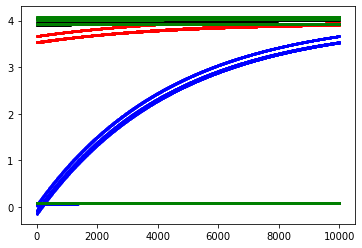

In [186]:
print(W_Array.shape)

W_Array=W_Array.reshape(4,epoch)
print(W_Array.shape)

print(W_Array[0].shape)
print(x_epoch.shape)


plt.scatter(x_epoch,W_Array[0],c="b",s=2)
plt.scatter(x_epoch,W_Array[1],c="r",s=2)
plt.scatter(x_epoch,W_Array[2],c="black",s=2)
plt.scatter(x_epoch,W_Array[3],c="green",s=2)





plt.show()

6. plotting the output results

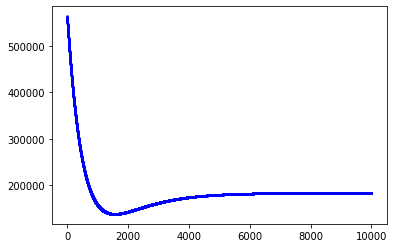

In [187]:
plt.scatter(x_epoch,train_loss_Array,c="b",s=2)
plt.show()

7. plotting the energy values

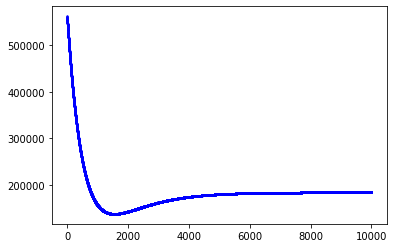

In [188]:
plt.scatter(x_epoch,test_loss_Array,c="b",s=2)
plt.show()